集群中心的座標: [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
實際: [1, 1, 1, 0, 0, 0]
預測[1,1],[2.3,2.1]: [1 0]


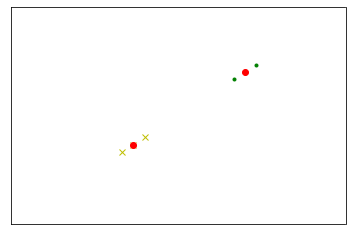

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

X = np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
y = [1,1,1,0,0,0]
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
print("集群中心的座標:",kmeans.cluster_centers_)
print("預測:",kmeans.predict(X))
print("實際:",y)
print("預測[1,1],[2.3,2.1]:",kmeans.predict([[1,1],[2.3,2.1]]))

plt.axis([0,3,0,3])
plt.plot(X[:3,0],X[:3,1],"yx")
plt.plot(X[3:,0],X[3:,1],"g.")
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],"ro")
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans = KMeans(n_clusters = 3)
kmeans_fit = kmeans.fit(iris_X_train)

print("實際:",iris_y_train)
print("預測",kmeans_fit.labels_)

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整:",iris_y_train)

score = metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))
print("準確率:{0:f}".format(score))

實際: [1 2 2 0 1 1 2 1 0 2 2 2 1 1 1 0 0 1 1 1 2 2 2 0 0 2 1 2 2 0 2 2 0 2 0 2 2
 1 1 1 1 0 2 1 0 2 1 0 0 0 2 1 1 0 0 1 2 0 0 2 1 0 1 0 0 2 0 0 1 2 1 1 0 0
 2 0 0 1 1 1 2 2 2 2 0 0 1 2 2 0 0 0 1 0 1 0 1 1 2 2 0 0 1 1 2 2 0 1 2 1 1
 0 0 2 1 1 0 0 1 1]
預測 [0 0 2 1 0 0 2 0 1 0 2 2 0 0 0 1 1 0 0 0 0 2 2 1 1 0 0 0 2 1 2 2 1 0 1 2 0
 0 0 0 0 1 0 0 1 2 0 1 1 1 2 0 0 1 1 0 2 1 1 2 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 2 1 1 0 0 0 2 2 2 2 1 1 0 2 2 1 1 1 0 1 0 1 0 2 2 2 1 1 0 0 2 0 1 0 2 0 2
 1 1 2 0 0 1 1 0 0]
調整: [0 2 2 1 0 0 2 0 1 2 2 2 0 0 0 1 1 0 0 0 2 2 2 1 1 2 0 2 2 1 2 2 1 2 1 2 2
 0 0 0 0 1 2 0 1 2 0 1 1 1 2 0 0 1 1 0 2 1 1 2 0 1 0 1 1 2 1 1 0 2 0 0 1 1
 2 1 1 0 0 0 2 2 2 2 1 1 0 2 2 1 1 1 0 1 0 1 0 0 2 2 1 1 0 0 2 2 1 0 2 0 0
 1 1 2 0 0 1 1 0 0]
準確率:0.891667


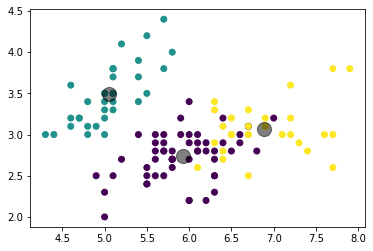

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]
y1=iris_X_train[:,1]
plt.scatter(x1,y1, c=y_predict,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);
plt.show()

Automatically created module for IPython interactive environment


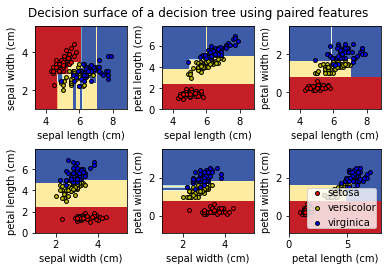

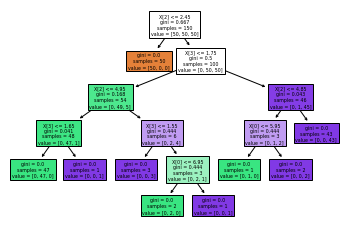

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

來源網址：

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
<br>
K-means clustering V.S Decision Trees 決策樹：
<br>
K-means clustering>監督式   /   Decision Trees>非監督式
<br>
K-means clustering>決策階段較不明確   /   Decision Trees>決策階段都相當的明確清楚
<br>
K-means clustering>分成n群   /   Decision Trees>二分法一直分下去
<br>
K-means clustering>運氣成分高   /   Decision Trees>準確率高
<br>
K-means clustering>有終點(n群)   /   Decision Trees>沒限制就無限延伸下去
<br>